In [1]:
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot  as plt
from sklearn.datasets import load_iris
import seaborn as sns
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(25)
df['target'] = iris.target
df.isnull().sum()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


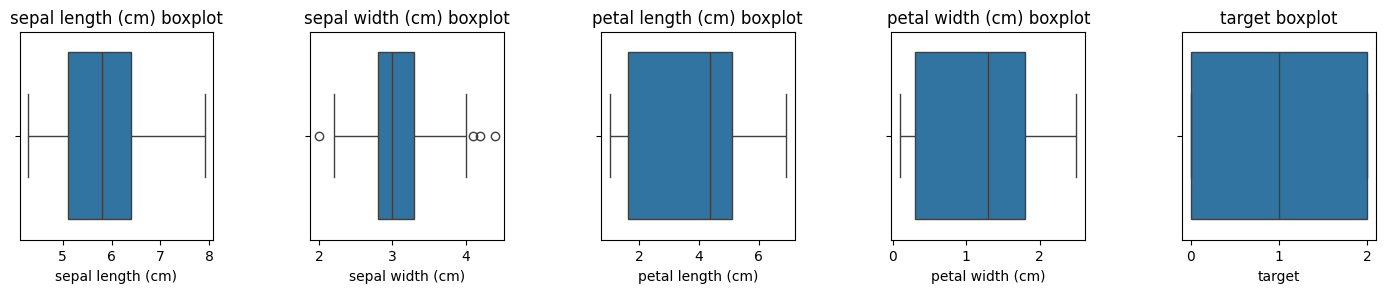

In [2]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(25, 20))
for i, col in enumerate(num_cols):
    plt.subplot(5, 7, i+1)
    sns.boxplot(df[col], orient="h") 
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.6, wspace=.5)
plt.show()

In [3]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_5208\1797019663.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_5208\1797019663.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

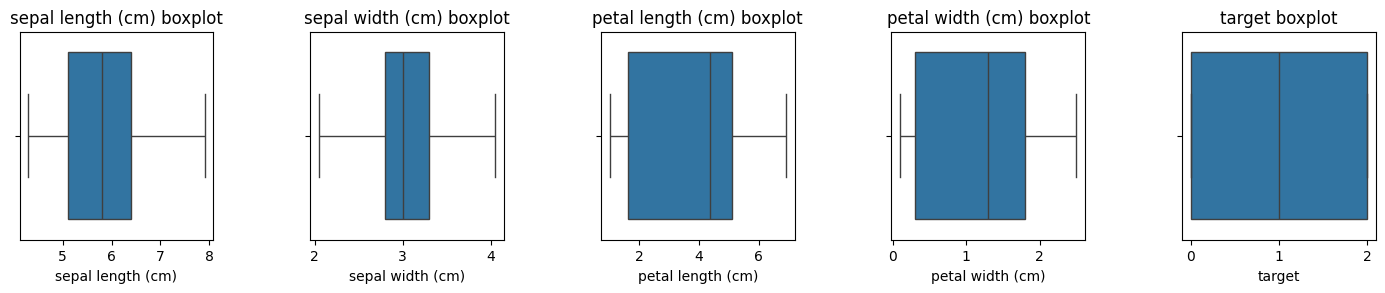

In [4]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(25, 20))
for i, col in enumerate(num_cols):
    plt.subplot(5, 7, i+1)
    sns.boxplot(df[col], orient="h") 
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.6, wspace=.5)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x=df.drop(['target'],axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
z=KNeighborsClassifier(n_neighbors=2)
z.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [11]:
from sklearn.metrics import accuracy_score
y_pred = z.predict(X_test)
accuracy_score(y_test,y_pred)

0.9777777777777777

In [21]:
from sklearn.model_selection import GridSearchCV
params=iris.feature_names
grid_search=GridSearchCV(estimator=KNeighborsClassifier,
                        param_grid=params,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1
                        )
grid_search=grid_search.fit(X_train,y_train)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
#قبل اختراع ال gridsearch 
x=[]
for i in range(1,20):
    z=KNeighborsClassifier(n_neighbors=i)
    z.fit(X_train, y_train)
    y_pred = z.predict(X_test)
    x.append(accuracy_score(y_test,y_pred))
max=0
z=-1
for i in range(len(x)):
    if x[i] > z:
        z=x[i]
        max=i
max+1

1